In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import time
import os

import generate_player_seasons as g

def load_db_credentials():
    '''Load database credentials from bash_profile'''

    user = os.environ['db_user']
    password = os.environ['db_pass']
    server = os.environ['db_host']
    database = os.environ['db_name']
    port = os.environ['db_port']

    return user, password, server, database, port

# load database credentials and create connection
user, password, server, database, port = load_db_credentials()
engine = create_engine(f'postgresql://{user}:{password}@{server}:{port}/{database}')

In [2]:
start = time.time()

print('--- Reading Data From Database ---')

draft_year = 2016
# read data in from database
players = pd.read_sql(f'''select * from player_info where draft_year_eligible >= {draft_year}''', engine).sort_values('draft_pick')

--- Reading Data From Database ---


In [3]:
playerids = players[players.rights.notnull() | players.draft_team.notnull()].playerid.values
print(f'--- Simulating {playerids.shape[0]} Prospects since {draft_year} NHL Draft ---')

--- Simulating 830 Prospects since 2016 NHL Draft ---


In [4]:
sim = g.GeneratePlayer()

[01:59:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


--- Simulating Seasons --- Nico Hischier --- Age: 21
--- Simulation Complete --- Nico Hischier --- Age: 22
--- Simulating Seasons --- Nico Hischier --- Age: 22
--- Simulation Complete --- Nico Hischier --- Age: 22


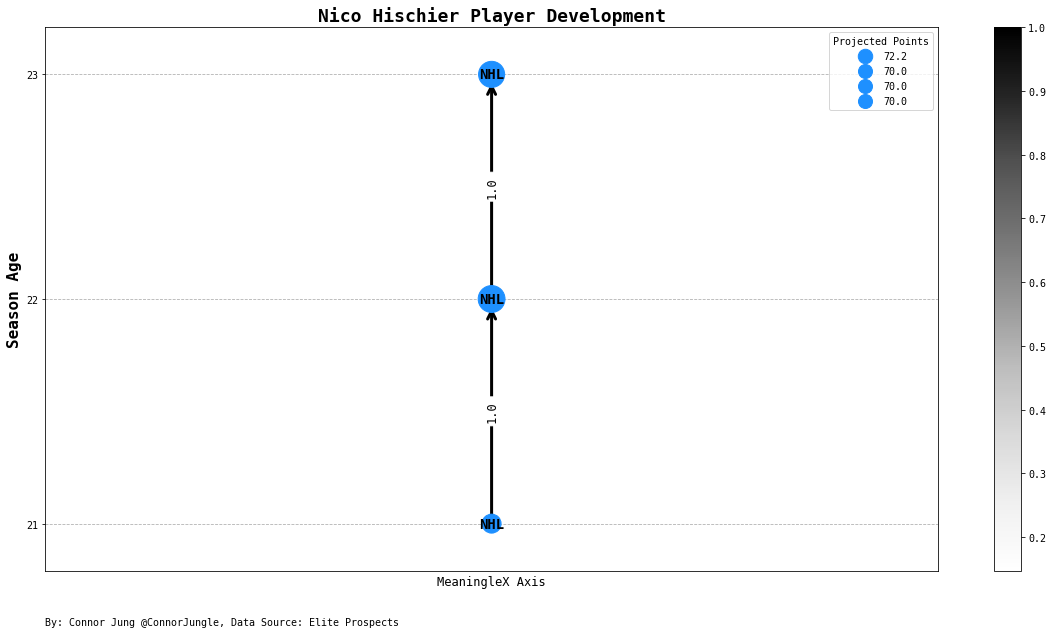

--- Simulating Seasons --- Rasmus Dahlin --- Age: 20
--- Simulation Complete --- Rasmus Dahlin --- Age: 21
--- Simulating Seasons --- Rasmus Dahlin --- Age: 21
--- Simulation Complete --- Rasmus Dahlin --- Age: 21
--- Simulating Seasons --- Rasmus Dahlin --- Age: 22
--- Simulating Seasons --- Rasmus Dahlin --- Age: 22
--- Simulation Complete --- Rasmus Dahlin --- Age: 22


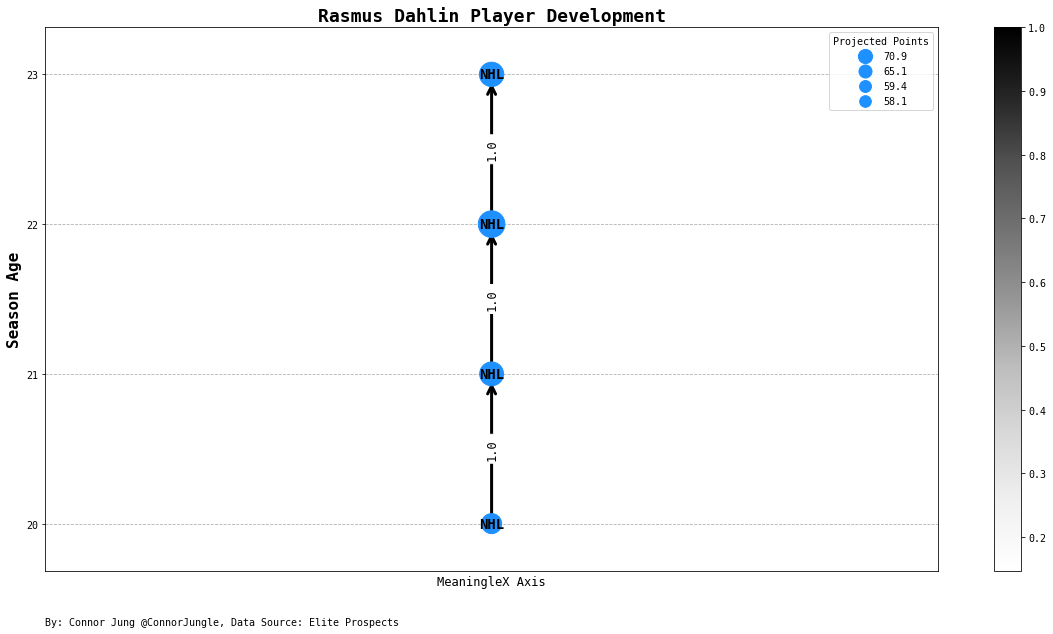

--- Simulating Seasons --- Jack Hughes --- Age: 19
--- Simulation Complete --- Jack Hughes --- Age: 20
--- Simulating Seasons --- Jack Hughes --- Age: 20
--- Simulation Complete --- Jack Hughes --- Age: 20
--- Simulating Seasons --- Jack Hughes --- Age: 21
--- Simulating Seasons --- Jack Hughes --- Age: 21
--- Simulation Complete --- Jack Hughes --- Age: 21
--- Simulating Seasons --- Jack Hughes --- Age: 22
--- Simulating Seasons --- Jack Hughes --- Age: 22
--- Simulation Complete --- Jack Hughes --- Age: 22


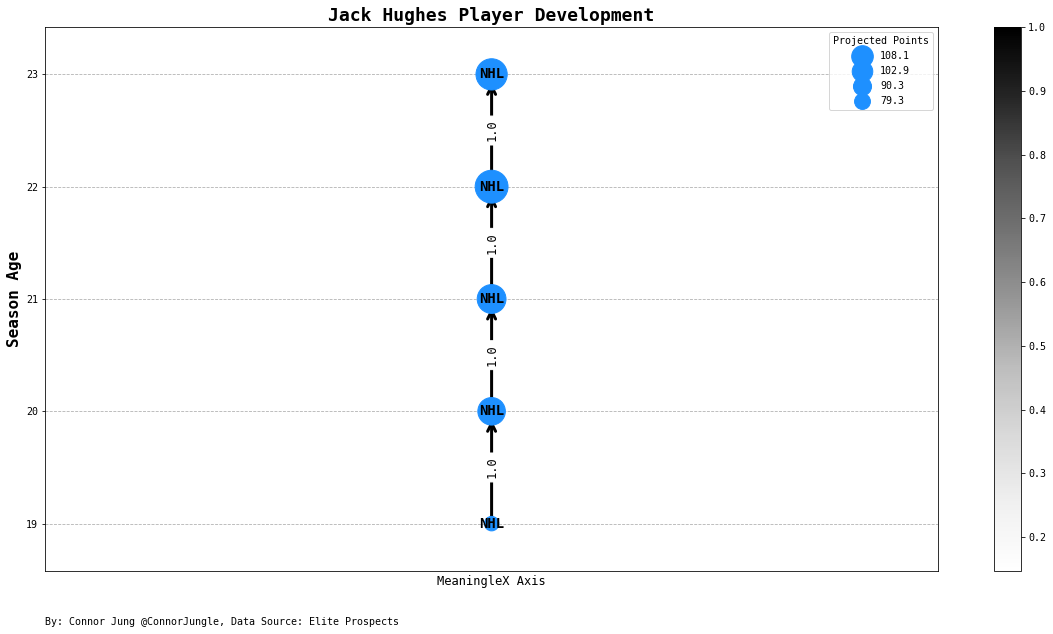

Failed to load Auston Matthews
--- Simulating Seasons --- Owen Tippett --- Age: 21
--- Simulation Complete --- Owen Tippett --- Age: 22
--- Simulating Seasons --- Owen Tippett --- Age: 22
--- Simulation Complete --- Owen Tippett --- Age: 22


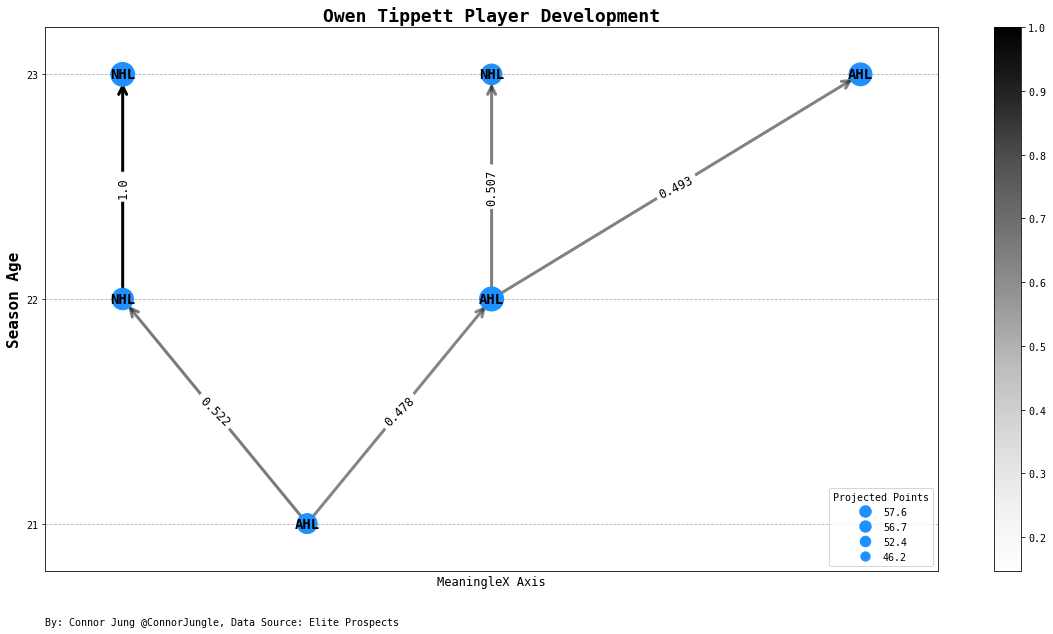

--- Simulating Seasons --- Vasili Podkolzin --- Age: 19
--- Simulation Complete --- Vasili Podkolzin --- Age: 20
--- Simulating Seasons --- Vasili Podkolzin --- Age: 20
--- Simulation Complete --- Vasili Podkolzin --- Age: 20
--- Simulating Seasons --- Vasili Podkolzin --- Age: 21
--- Simulating Seasons --- Vasili Podkolzin --- Age: 21
--- Simulation Complete --- Vasili Podkolzin --- Age: 21
--- Simulating Seasons --- Vasili Podkolzin --- Age: 22
--- Simulating Seasons --- Vasili Podkolzin --- Age: 22
--- Simulation Complete --- Vasili Podkolzin --- Age: 22


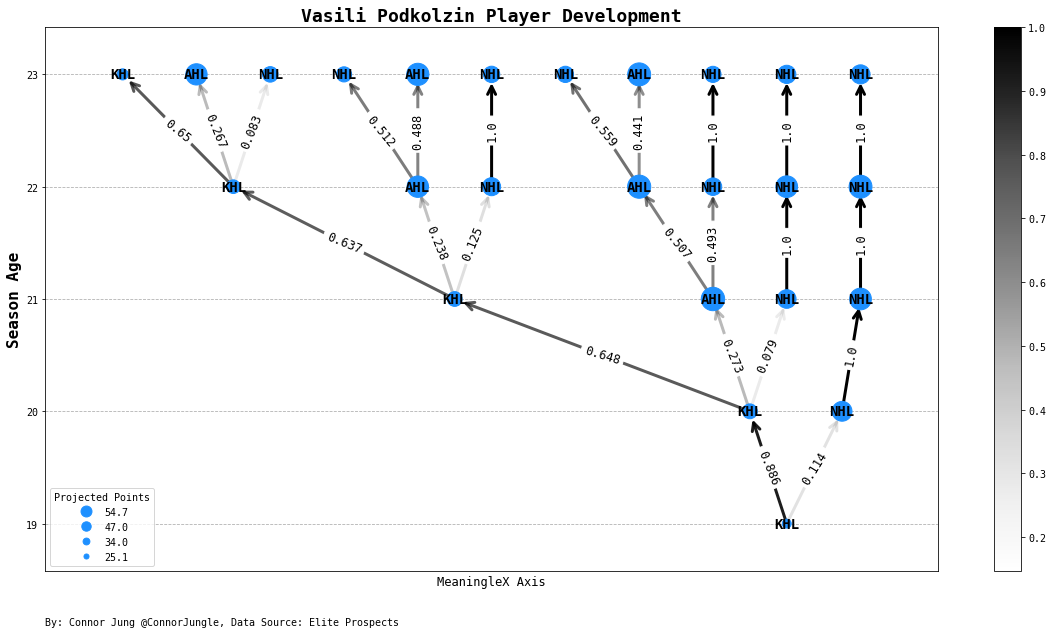

--- Simulating Seasons --- Tyson Jost --- Age: 22
--- Simulation Complete --- Tyson Jost --- Age: 23
--- Simulating Seasons --- Tyson Jost --- Age: 23
Failed to load Tyson Jost
--- Simulating Seasons --- Evan Bouchard --- Age: 21
--- Simulation Complete --- Evan Bouchard --- Age: 22
--- Simulating Seasons --- Evan Bouchard --- Age: 22
--- Simulation Complete --- Evan Bouchard --- Age: 22


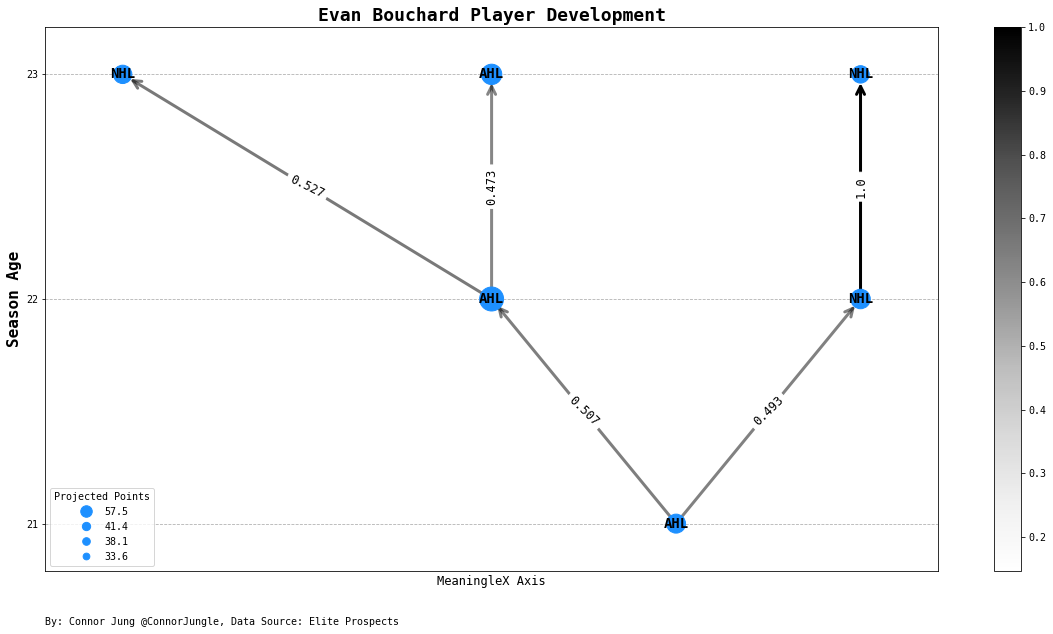

--- Simulating Seasons --- Victor Mete --- Age: 22
--- Simulation Complete --- Victor Mete --- Age: 23
--- Simulating Seasons --- Victor Mete --- Age: 23
Failed to load Victor Mete
--- Simulating Seasons --- Matej Blümel --- Age: 20
--- Simulation Complete --- Matej Blümel --- Age: 21
--- Simulating Seasons --- Matej Blümel --- Age: 21
--- Simulation Complete --- Matej Blümel --- Age: 21
--- Simulating Seasons --- Matej Blümel --- Age: 22
--- Simulating Seasons --- Matej Blümel --- Age: 22
--- Simulation Complete --- Matej Blümel --- Age: 22


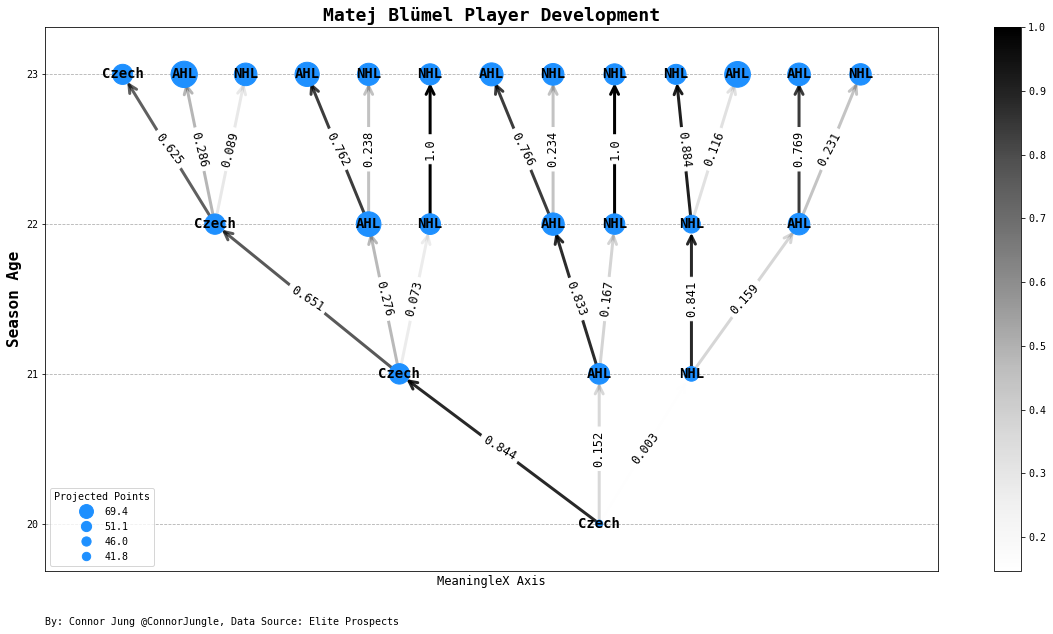

--- Simulating Seasons --- Malte Setkov --- Age: 21
--- Simulation Complete --- Malte Setkov --- Age: 22
--- Simulating Seasons --- Malte Setkov --- Age: 22
--- Simulation Complete --- Malte Setkov --- Age: 22


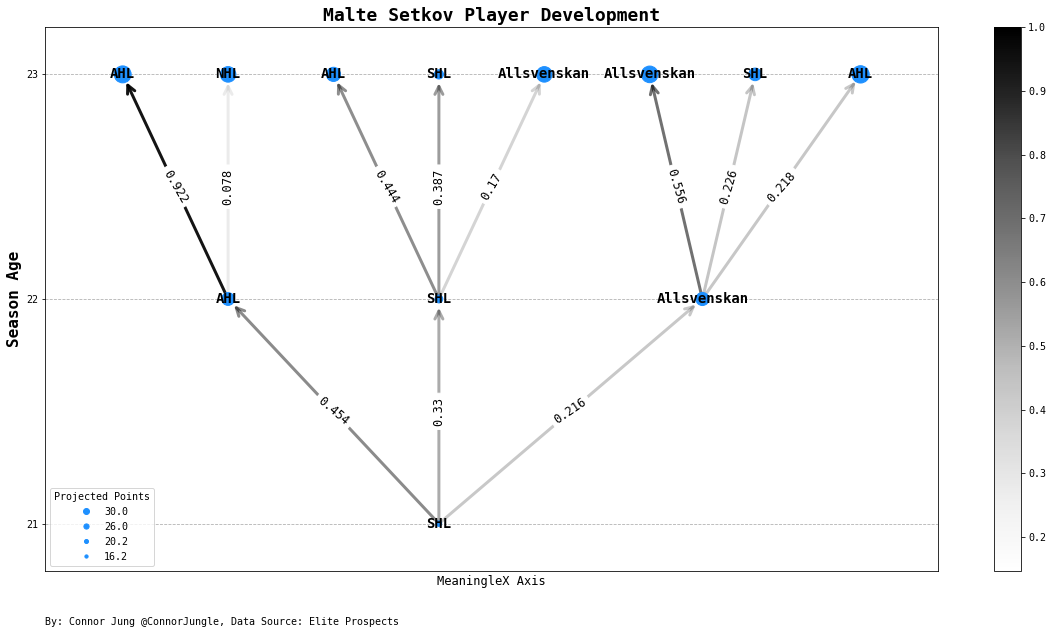

--- Simulating Seasons --- Nico Gross --- Age: 20
--- Simulation Complete --- Nico Gross --- Age: 21
--- Simulating Seasons --- Nico Gross --- Age: 21
--- Simulation Complete --- Nico Gross --- Age: 21
--- Simulating Seasons --- Nico Gross --- Age: 22
--- Simulating Seasons --- Nico Gross --- Age: 22
--- Simulation Complete --- Nico Gross --- Age: 22


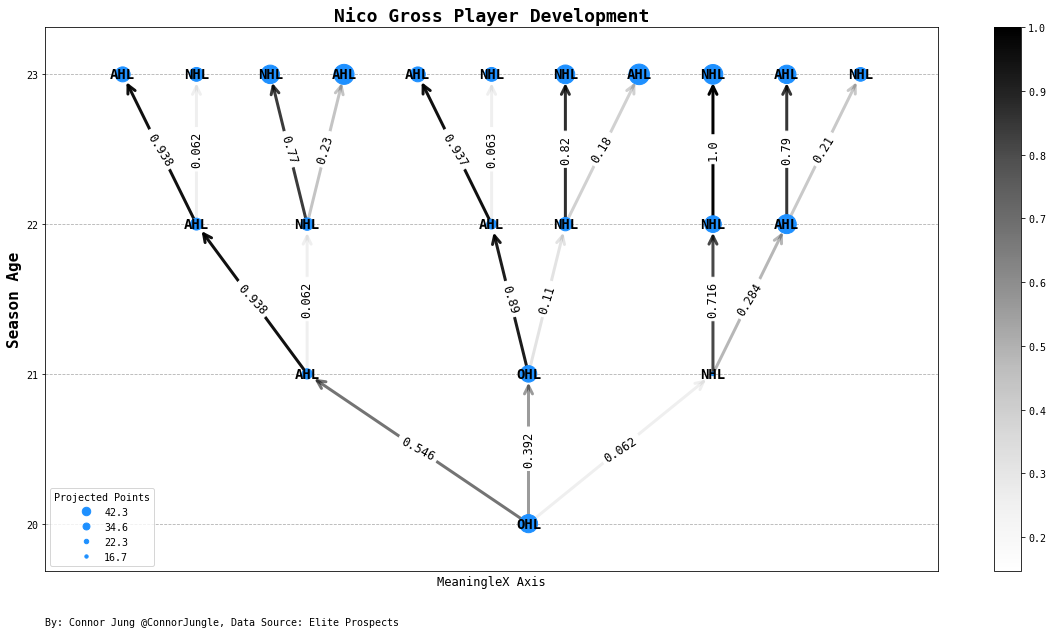

--- Simulating Seasons --- Keaton Middleton --- Age: 22
--- Simulation Complete --- Keaton Middleton --- Age: 23
--- Simulating Seasons --- Keaton Middleton --- Age: 23
--- Simulation Complete --- Keaton Middleton --- Age: 23


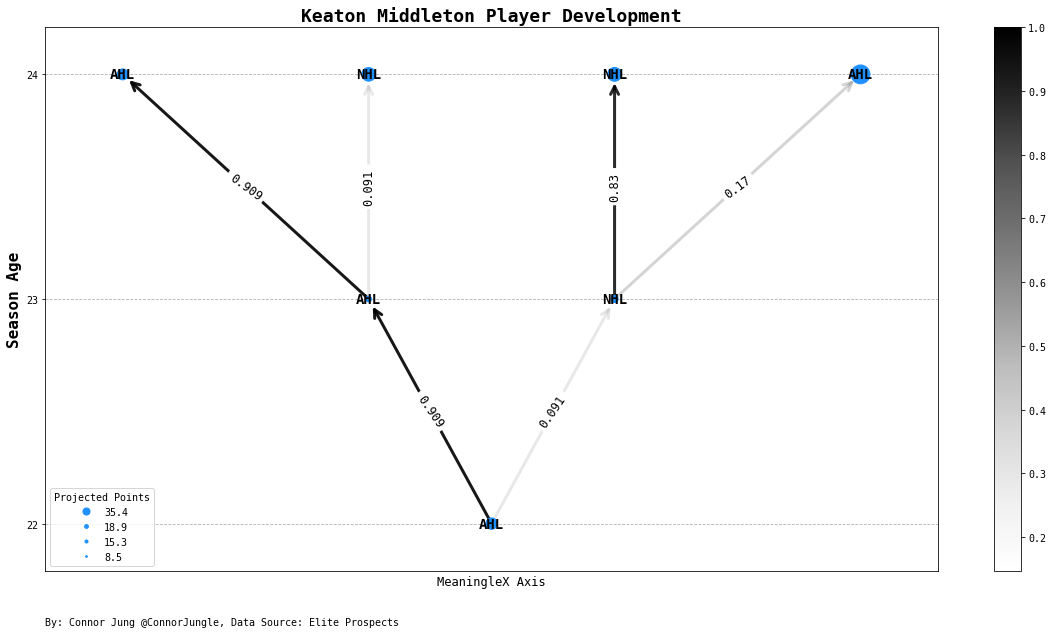

--- Simulating Seasons --- Liam Hawel --- Age: 21
--- Simulation Complete --- Liam Hawel --- Age: 22
--- Simulating Seasons --- Liam Hawel --- Age: 22
--- Simulation Complete --- Liam Hawel --- Age: 22


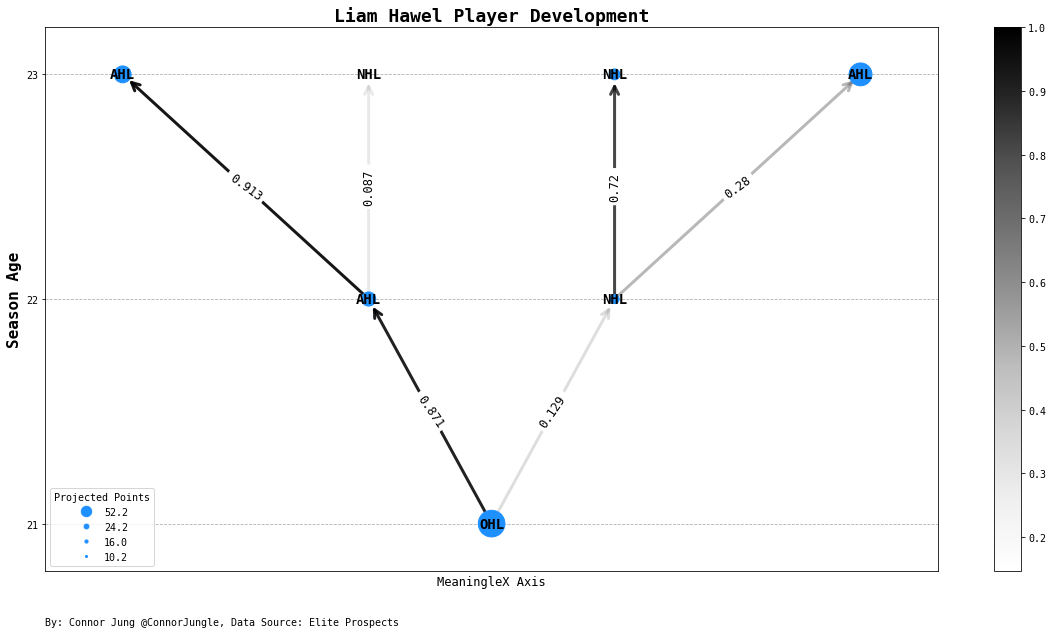

--- Simulating Seasons --- Henry Thrun --- Age: 19
--- Simulation Complete --- Henry Thrun --- Age: 20
--- Simulating Seasons --- Henry Thrun --- Age: 20
--- Simulation Complete --- Henry Thrun --- Age: 20
--- Simulating Seasons --- Henry Thrun --- Age: 21
--- Simulating Seasons --- Henry Thrun --- Age: 21
--- Simulation Complete --- Henry Thrun --- Age: 21
--- Simulating Seasons --- Henry Thrun --- Age: 22
--- Simulating Seasons --- Henry Thrun --- Age: 22
--- Simulation Complete --- Henry Thrun --- Age: 22


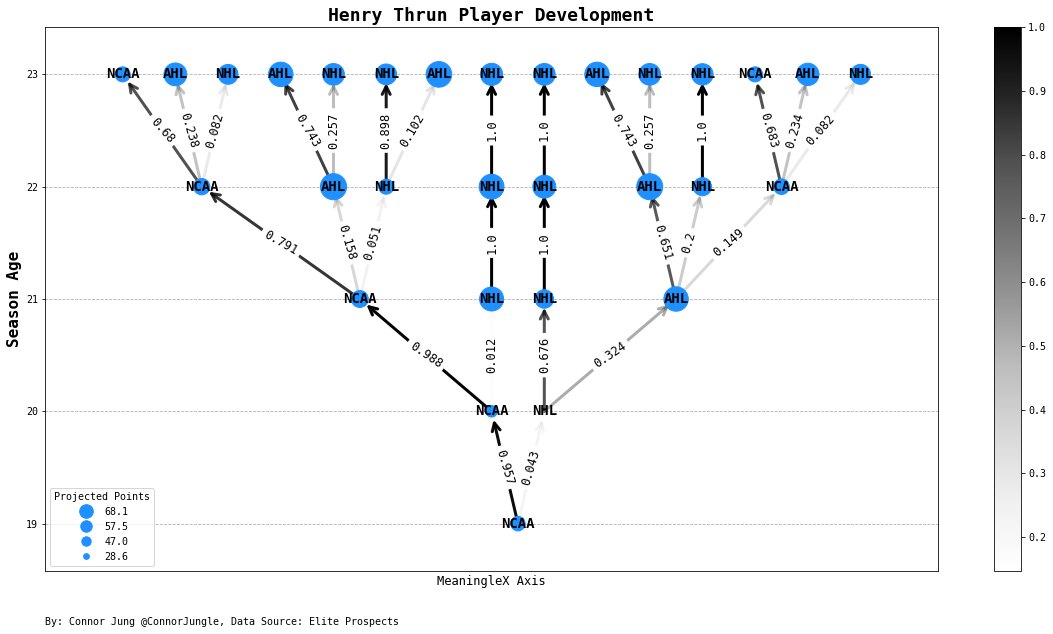

--- Simulating Seasons --- Jasper Weatherby --- Age: 22
--- Simulation Complete --- Jasper Weatherby --- Age: 23
--- Simulating Seasons --- Jasper Weatherby --- Age: 23


In [ ]:
player_projections = []
for pid in playerids:
    try:
        player_projections.append(sim.run(pid))
    except:
        print(f'Failed to load {sim.player_name}')
        
player_projections = pd.concat(player_projections)
print(f'--- Player Simulations Complete --- Runtime: {round((time.time() - start) / 60, 2)} mins')